## 实验题目1 拉格朗日(Lagrange)插值

### 代码实现

In [113]:
using Printf
using LinearAlgebra
using Plots

In [114]:
# Lagrange Interpolation method
function lagrange(xs, fxs, x::Number)
    # plot(xs,ys)
    num = size(xs, 1)
    y, i = 0.0, 1
    while i <= num
        li = 1.0
        # for j in filter(x -> x != i, 1:num)  # much slower than continue
        for j in 1:num
            if j == i
                continue
            end
            li *= (x - xs[j]) / (xs[i] - xs[j])
        end
        y += li * fxs[i]
        i += 1
    end
    x, y
end
function lagrange(xs, fxs, x::Vector)
    # plot(xs,ys)
    num = size(xs, 1)
    y, i = zeros(size(x, 1)), 1
    li = zeros(size(x, 1))  # 两种写法孰优孰劣还不好说，得写代码来验证
    while i <= num
        li .= 1.0
        # li = repeat([1.0], size(x, 1))
        # for j in filter(x -> x != i, 1:num)  # much slower than continue
        for j in 1:num
            if j == i
                continue
            end
            li = li .* (x .- xs[j]) / (xs[i] - xs[j])
        end
        y = y + li .* fxs[i]
        i += 1
    end
    x, y
end

lagrange (generic function with 2 methods)

In [115]:
function show_error(f::Function, title::String, series_x, series_y)
    errors = abs.(f.(series_x) - series_y) ./ f.(series_x)
    plot(series_x, errors, label="relative error", title=title, legend=:outertopright)
    # plot!(ylim=(0, 1))
end

show_error (generic function with 2 methods)

### 测试代码

#### Test 1 - Simple

In [116]:
xs = [0, 2, 3, 5, 6]
ys = [1, 3, 2, 5, 6]
# xs = [x for x in 1:1000]
# ys = [y^2 for y in 1:1000]
# 多项式插值法的弊端，当n过大会导致失真
xs = [0.4, 0.55, 0.65, 0.80]
ys = [0.41075, 0.57815, 0.69675, 0.88811]
@time lagrange(xs, ys, 0.55)

  0.014786 seconds (19.91 k allocations: 1.103 MiB, 99.81% compilation time)


(0.55, 0.57815)

### 实验题目

#### 问题 1

拉格朗日插值多项式的次数n越大越好吗？
 
> 不是，若是次数过高，会出现Runge现象，插值多项式在距离已知点位置较远处会剧烈震荡，直观呈现如下列问题所作示意图


In [117]:
function show_result(f::Function, split_nums::Vector, test_x::Vector, xlim::Vector, ylim::Vector)
    for n in split_nums
        x_min, x_max = xlim
        x_range = x_min-0.2:0.02:x_max+0.2
        xs = x_min:(x_max-x_min)/n:x_max
        ys = f.(xs)

        # (xlim=(xMin,xMax), ylim=(yMin, yMax), yflip = false)
        # https://stackoverflow.com/questions/53230969/how-to-scale-a-plot-in-julia-using-plots-jl
        plot(x_range, f.(x_range), label="f(x)")  # plot f(x)
        plot!(legend=:outertopright, title="$n-Order Interpolation")
        plot!(ylim=ylim, yflip=false)  # add ylim
        plot!(xs, ys, seriestype=:scatter, markersize=3, msw=1, color=:deepskyblue, label="sample")  # add sample for lagrange interporlation

        test_y = f.(test_x)
        plot!(test_x, test_y, seriestype=:scatter, markersize=3, msw=1, color=:blue, label="true")  # add test x & y, plot true points
        _, pred_y = lagrange(xs, ys, test_x)
        # @time _, pred_y = lagrange(xs, ys, test_x)
        println("$n-Order Interpolation:")
        println("test_x: $test_x")
        println("test_y: $test_y")
        println("pred_y: $pred_y")
        series_x = Vector(x_range)
        _, series_y = lagrange(xs, ys, series_x)  # compute the interporlation function points
        plot!(series_x, series_y, label="p(x)")  # add p(x) function curve
        display(plot!(test_x, pred_y, seriestype=:scatter, markersize=3, msw=1, color=:red, label="approx"))  # add pred_y by lagrange interporlation
        display(show_error(f, "Error of $n-Order Interpolation", series_x, series_y))
    end
end

show_result (generic function with 2 methods)

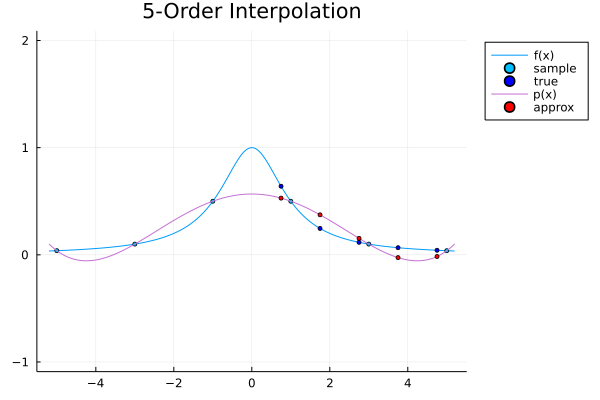

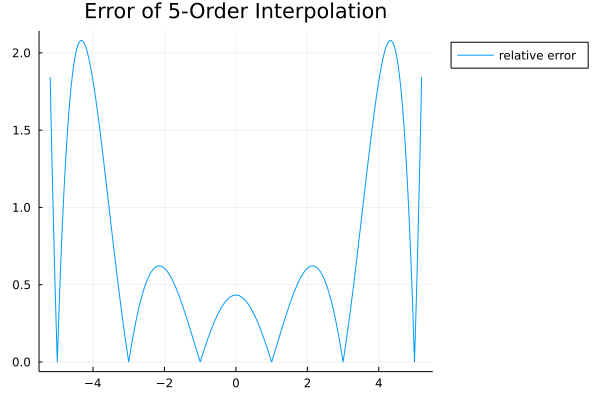

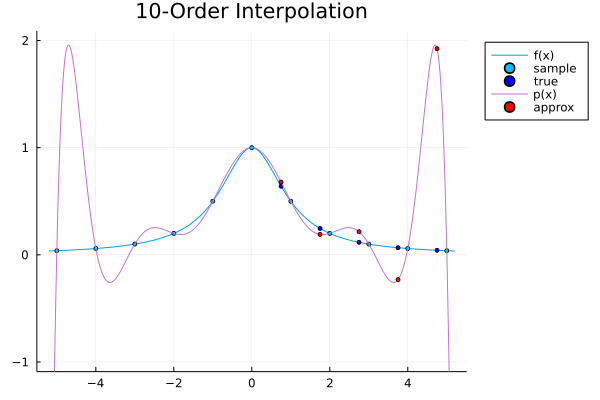

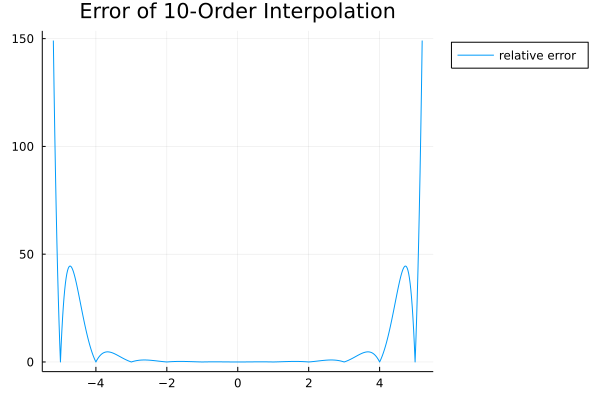

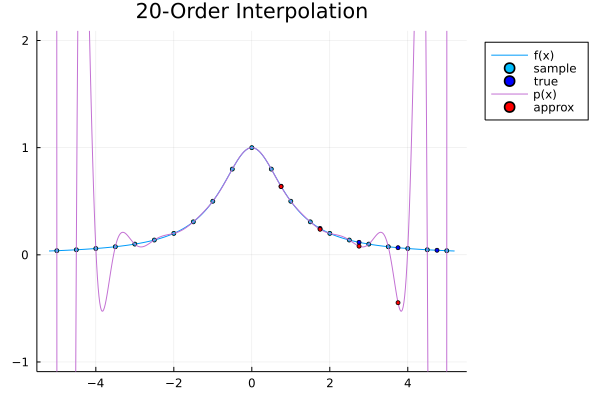

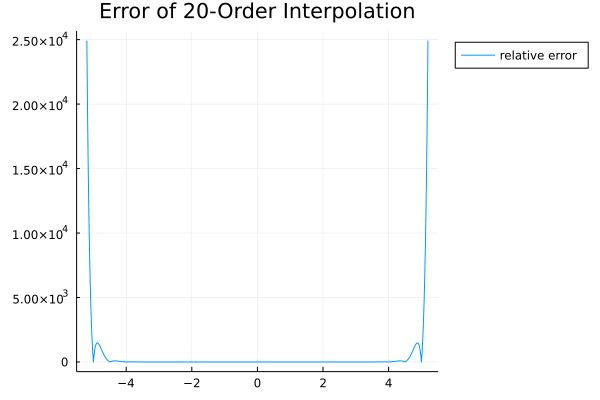

5-Order Interpolation:
test_x: [0.75, 1.75, 2.75, 3.75, 4.75]
test_y: [0.64, 0.24615384615384617, 0.11678832116788321, 0.06639004149377593, 0.042440318302387266]
pred_y: [0.528973858173077, 0.3733248197115384, 0.15373347355769232, -0.025954026442307696, -0.015737680288461536]
10-Order Interpolation:
test_x: [0.75, 1.75, 2.75, 3.75, 4.75]
test_y: [0.64, 0.24615384615384617, 0.11678832116788321, 0.06639004149377593, 0.042440318302387266]
pred_y: [0.678989577293396, 0.19058046675375687, 0.21559187891256765, -0.23146174989674442, 1.9236311497192042]
20-Order Interpolation:
test_x: [0.75, 1.75, 2.75, 3.75, 4.75]
test_y: [0.64, 0.24615384615384617, 0.11678832116788321, 0.06639004149377593, 0.042440318302387266]
pred_y: [0.6367553359164332, 0.23844593373813264, 0.08065999342165572, -0.44705196070883363, -39.95244903304101]


In [118]:
f(x) = 1 / (1 + x^2)
split_nums = [5, 10, 20]
test_x = [0.75, 1.75, 2.75, 3.75, 4.75]
xlim = [-5, 5]
ylim = [-1, 2]
show_result(f, split_nums, test_x, xlim, ylim)


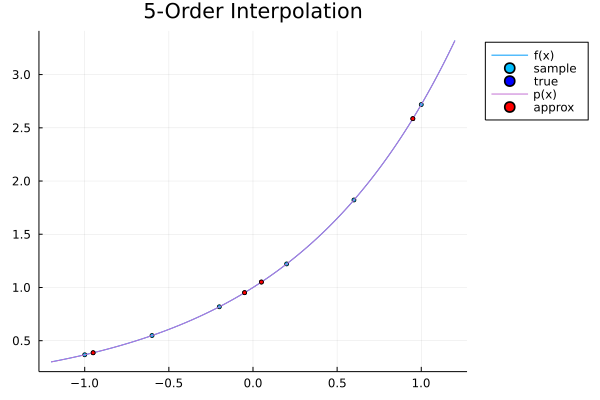

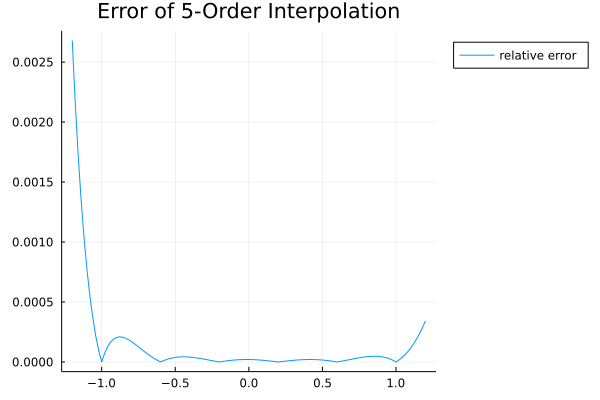

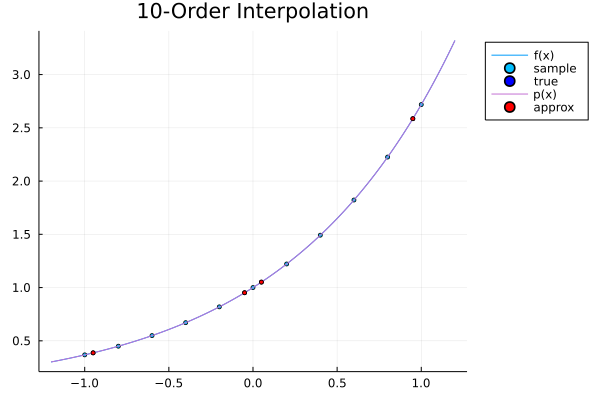

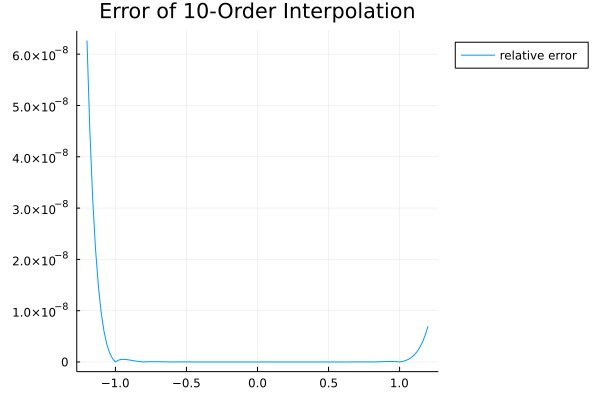

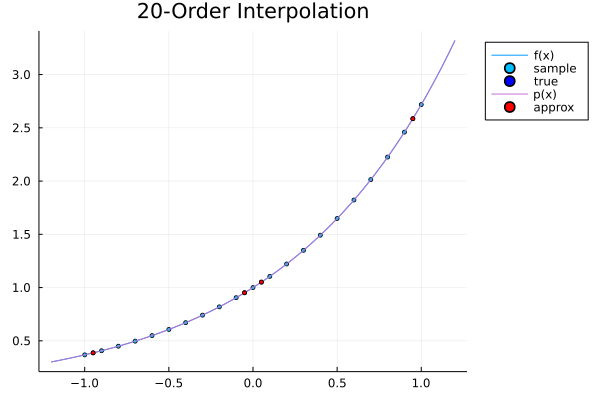

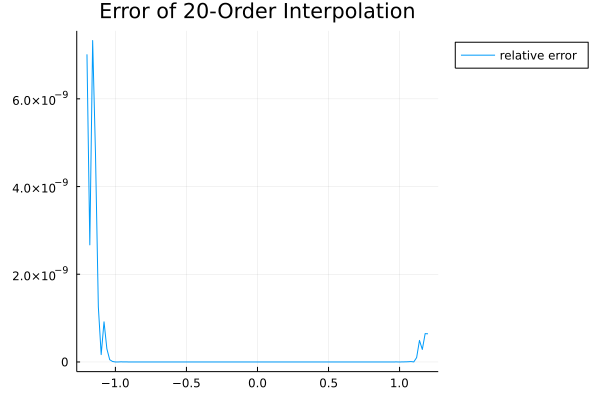

5-Order Interpolation:
test_x: [-0.95, -0.05, 0.05, 0.95]
test_y: [0.38674102345450123, 0.951229424500714, 1.0512710963760241, 2.585709659315846]
pred_y: [0.38679815885799357, 0.9512483333804465, 1.051290275808478, 2.5857845509846147]
10-Order Interpolation:
test_x: [-0.95, -0.05, 0.05, 0.95]
test_y: [0.38674102345450123, 0.951229424500714, 1.0512710963760241, 2.585709659315846]
pred_y: [0.3867410232556747, 0.9512294244990149, 1.0512710963777372, 2.585709659548761]
20-Order Interpolation:
test_x: [-0.95, -0.05, 0.05, 0.95]
test_y: [0.38674102345450123, 0.951229424500714, 1.0512710963760241, 2.585709659315846]
pred_y: [0.3867410234532931, 0.9512294245007142, 1.0512710963760243, 2.585709659315182]


In [119]:
f(x) = exp(x)
split_nums = [5, 10, 20]
test_x = [-0.95, -0.05, 0.05, 0.95]
xlim = [-1, 1]
# ylim = [-1, 10]  # the good-looking ylim is defined manually
ylim = []
show_result(f, split_nums, test_x, xlim, ylim)

#### 问题 2

插值区间越小越好吗?

> 不一定，从精度上考虑虽然有一定的合理性，但插值节点过于密集时，一方面计算量增大却没提高对于精度计算的收益，另一方面区间缩短、节点增加并不能保证两节点间能很好的逼近函数，反而有可能出现Runge现象。但合理的对区间长度进行选择，同时采用低次插值来避免Runge现象，能够得到较好的拟合效果。
> 
> 不过，实例中对于函数$f(x)=\frac{1}{1+x^2}$，较短区间的插值效果比长区间插值更好
> 
> 而函数$f(x)=e^x$无论是长区间还是短区间插值，都能得到相对较好的拟合效果，但短区间插值相对误差更低




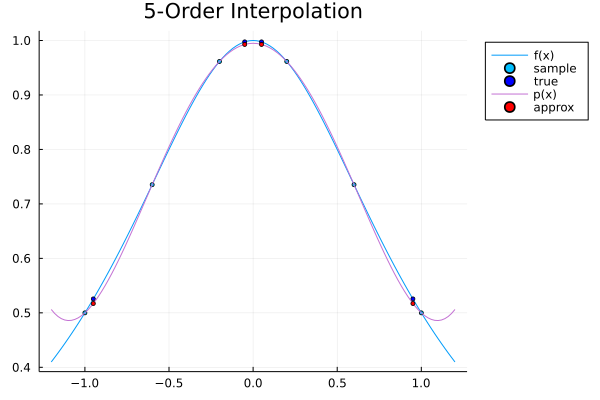

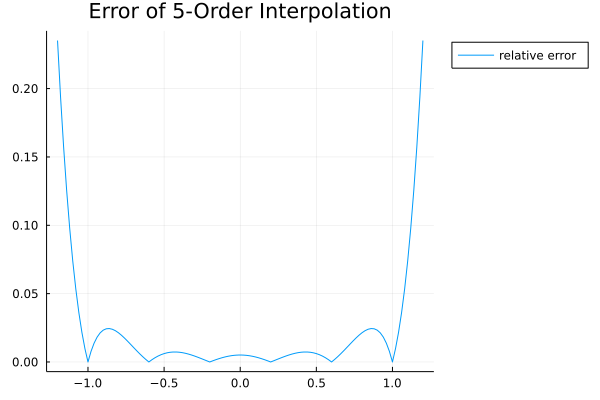

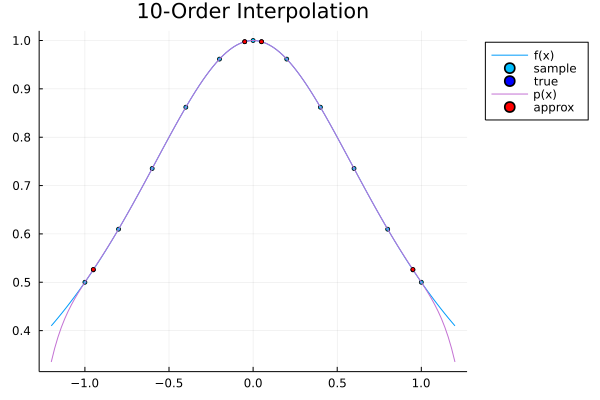

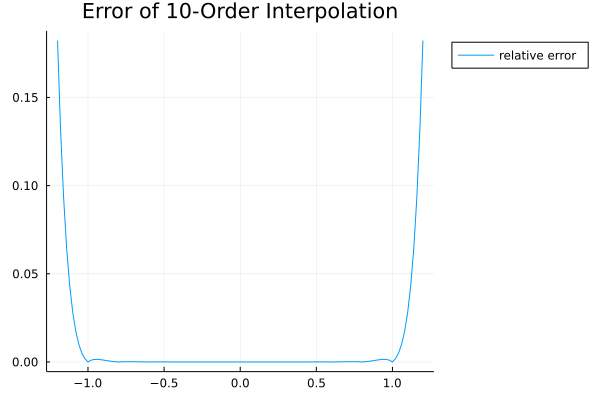

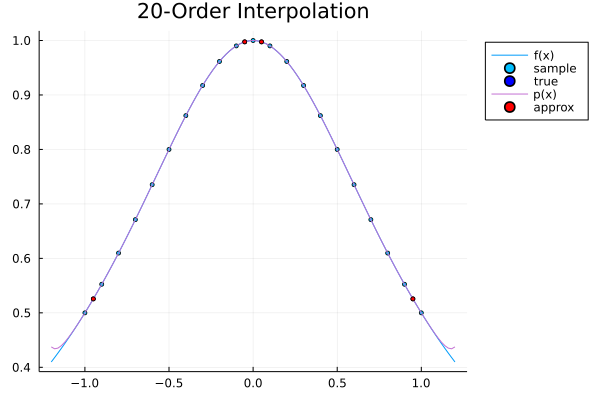

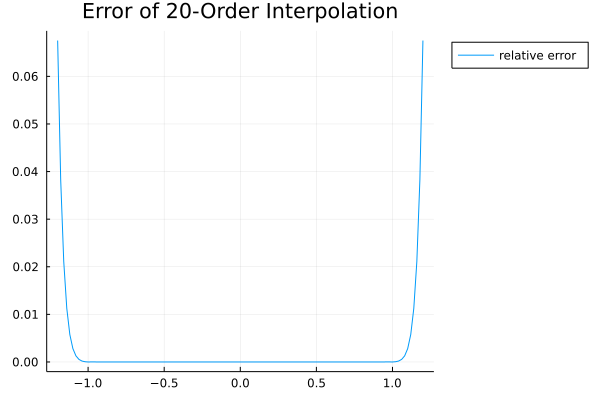

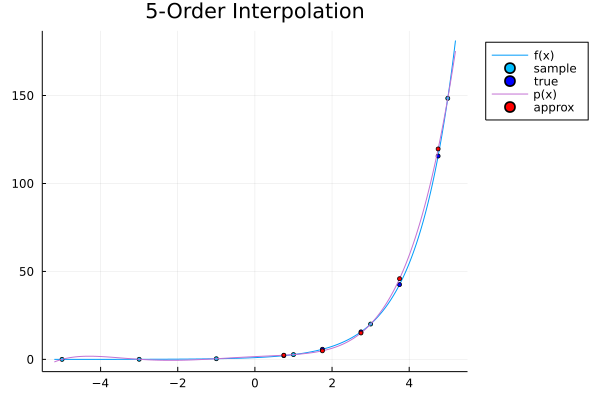

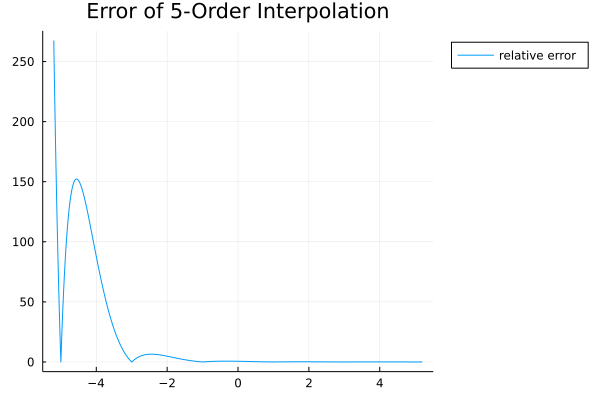

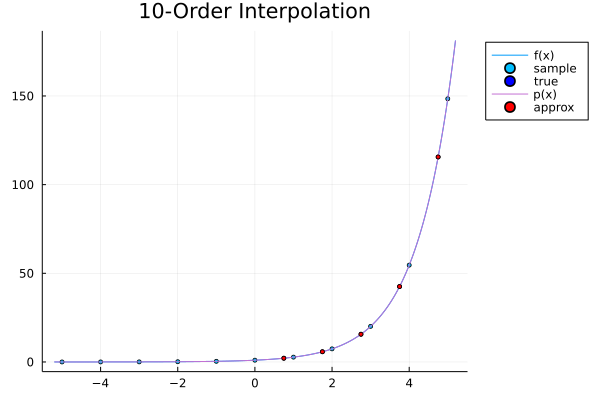

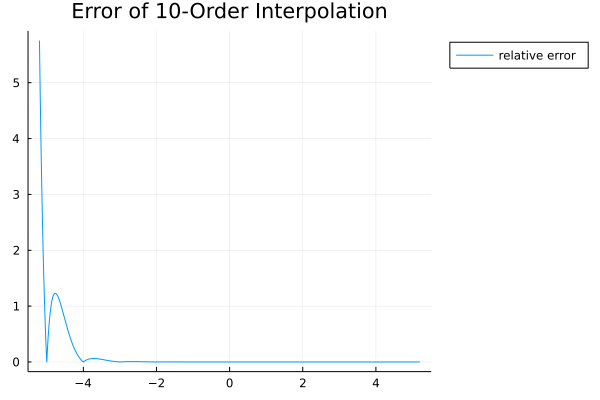

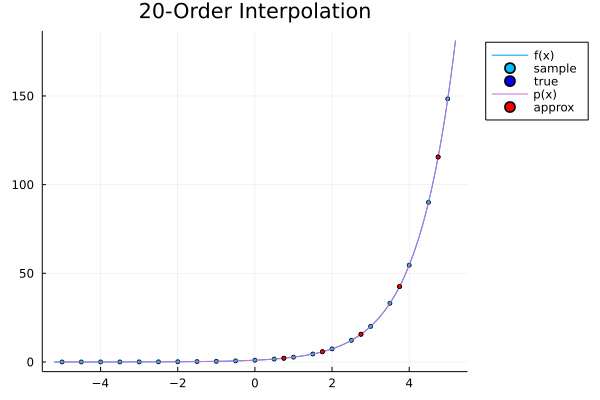

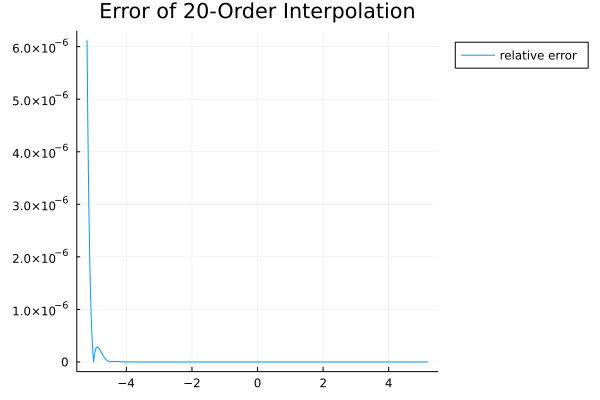

f(x) = 1 / (1 + x^2)
5-Order Interpolation:
test_x: [-0.95, -0.05, 0.05, 0.95]
test_y: [0.5256241787122208, 0.9975062344139651, 0.9975062344139651, 0.5256241787122208]
pred_y: [0.517147288602941, 0.992790670955882, 0.9927906709558821, 0.5171472886029413]
10-Order Interpolation:
test_x: [-0.95, -0.05, 0.05, 0.95]
test_y: [0.5256241787122208, 0.9975062344139651, 0.9975062344139651, 0.5256241787122208]
pred_y: [0.5264079831033747, 0.9975068566175541, 0.9975068566175546, 0.5264079831033778]
20-Order Interpolation:
test_x: [-0.95, -0.05, 0.05, 0.95]
test_y: [0.5256241787122208, 0.9975062344139651, 0.9975062344139651, 0.5256241787122208]
pred_y: [0.5256203657463834, 0.997506234424685, 0.997506234424685, 0.5256203657468875]
f(x) = exp(x)
5-Order Interpolation:
test_x: [0.75, 1.75, 2.75, 3.75, 4.75]
test_y: [2.117000016612675, 5.754602676005731, 15.642631884188171, 42.52108200006278, 115.58428452718766]
pred_y: [2.373956870299596, 4.871634881082521, 15.008060923792579, 45.86225677574345, 119.6

In [120]:
f(x) = 1 / (1 + x^2)
split_nums = [5, 10, 20]
test_x = [-0.95, -0.05, 0.05, 0.95]
xlim = [-1, 1]
# ylim = [-1, 2]
ylim = []
println("f(x) = 1 / (1 + x^2)")
show_result(f, split_nums, test_x, xlim, ylim)

f(x) = exp(x)
split_nums = [5, 10, 20]
test_x = [0.75, 1.75, 2.75, 3.75, 4.75]
xlim = [-5, 5]
# ylim = [-1, 10]  # the good-looking ylim is defined manually
ylim = []
println("f(x) = exp(x)")
show_result(f, split_nums, test_x, xlim, ylim)

#### 问题 4 

考虑拉格朗日插值问题，内插比外推更可靠吗？

> 不一定，这取决于函数的性质，但通常我们认为对于连续函数内插的可靠程度更高。
> 
> 外推等价于根据已知点预测完全未知点的函数值，但我们所得的插值多项式不含有任何有关待拟合函数的已知点外的信息，根据多项式函数的特性进行外推是不合理的
> 
> 而考虑到连续函数，内插则不会对于函数的拟合存在无根据的外推过程，有更高的可靠程度
> 
> 从实验结果来看，第一个实例体现的是外推的严重错误，尽管第二个实例中外推所得误差稍小于内插结果，但在事实上这只是所选区间拟合的巧合，而内插误差虽然略高，却也具有相当低的误差和相当高的可靠程度

In [121]:
function show_result(f::Function, split_nums::Nothing, split_xs::Vector, test_x, xlim, ylim)
    x_min, x_max = xlim
    x_range = x_min:1:x_max+0.2  # x_min cannot be negative
    xs = split_xs
    ys = f.(xs)

    plot(x_range, f.(x_range), label="f(x)")  # plot f(x)
    plot!(legend=:outertopright, title="$(size(split_xs,1))-Order Interpolation")
    plot!(ylim=ylim, yflip=false)  # add ylim
    plot!(xs, ys, seriestype=:scatter, markersize=3, msw=1, color=:deepskyblue, label="sample")  # add sample for lagrange interporlation

    test_y = f.(test_x)
    plot!(test_x, test_y, seriestype=:scatter, markersize=3, msw=1, color=:blue, label="true")  # add test x & y, plot true points
    _, pred_y = lagrange(xs, ys, test_x)
    # @time _, pred_y = lagrange(xs, ys, test_x)
    println("test_x: $test_x")
    println("test_y: $test_y")
    println("pred_y: $pred_y")

    series_x = Vector(x_range)
    _, series_y = lagrange(xs, ys, series_x)  # compute the interporlation function points
    plot!(series_x, series_y, label="p(x)")  # add p(x) function curve
    display(plot!(test_x, pred_y, seriestype=:scatter, markersize=3, msw=1, color=:red, label="approx"))  # add pred_y by lagrange interporlation
    display(show_error(f, "Error of $(size(split_xs,1))-Order Interpolation", series_x, series_y))
end

show_result (generic function with 2 methods)

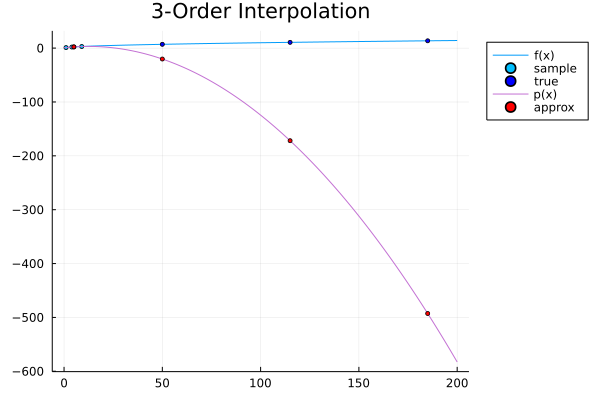

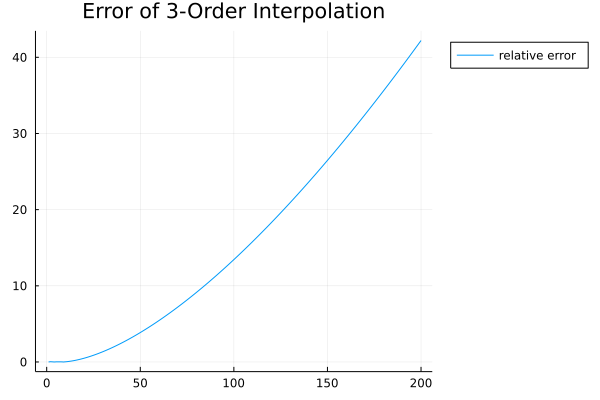

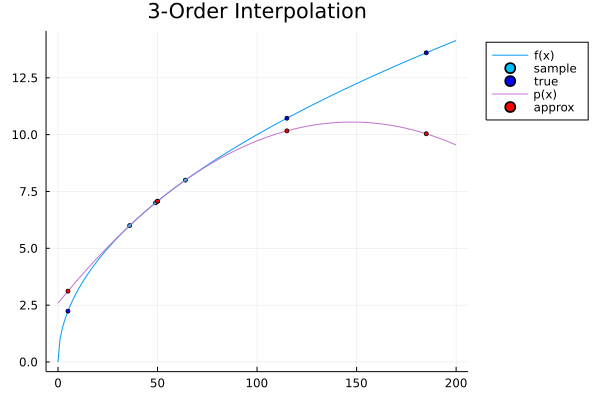

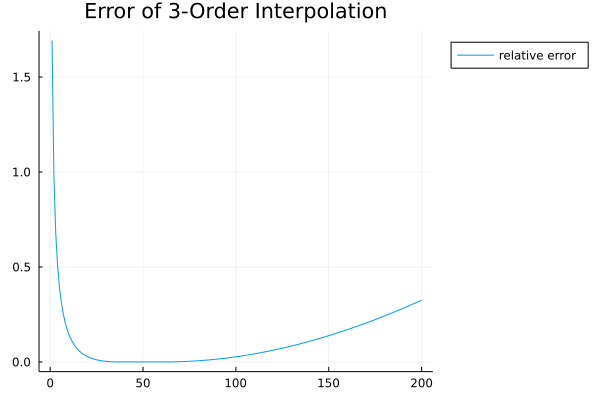

f(x) = sqrt(x)
test_x: [5, 50, 115, 185]
test_y: [2.23606797749979, 7.0710678118654755, 10.723805294763608, 13.601470508735444]
pred_y: [2.2666666666666666, -20.23333333333332, -171.89999999999998, -492.7333333333331]
f(x) = sqrt(x)
test_x: [5, 50, 115, 185]
test_y: [2.23606797749979, 7.0710678118654755, 10.723805294763608, 13.601470508735444]
pred_y: [3.1157509157509153, 7.0717948717948715, 10.167032967032995, 10.038827838827785]


In [122]:
f(x) = sqrt(x)
split_xs = [1, 4, 9]
test_x = [5, 50, 115, 185]
xlim = [0, 200]
# ylim = [-1, 2]
ylim = []
println("f(x) = sqrt(x)")
show_result(f, nothing, split_xs, test_x, xlim, ylim)

f(x) = sqrt(x)
split_xs = [36, 49, 64]
test_x = [5, 50, 115, 185]
xlim = [0, 200]
# ylim = [-1, 2]
ylim = []
println("f(x) = sqrt(x)")
show_result(f, nothing, split_xs, test_x, xlim, ylim)

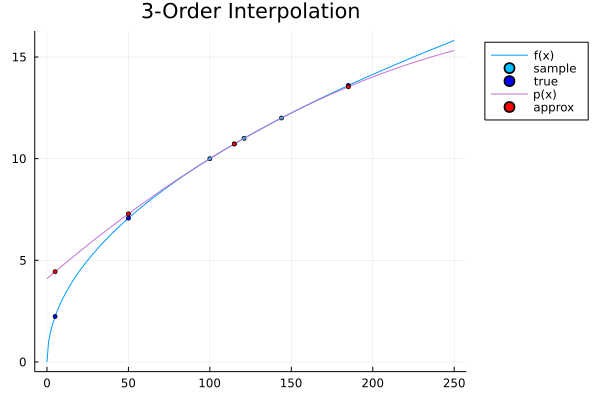

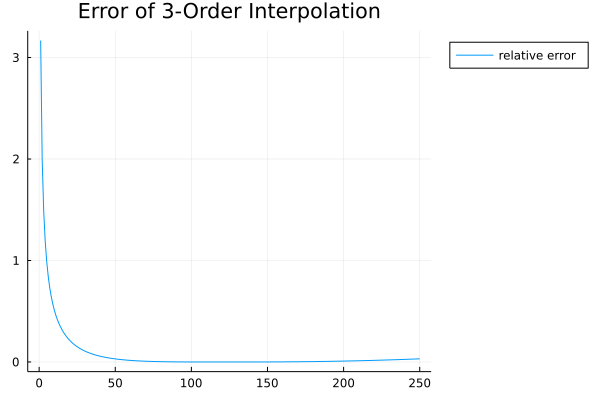

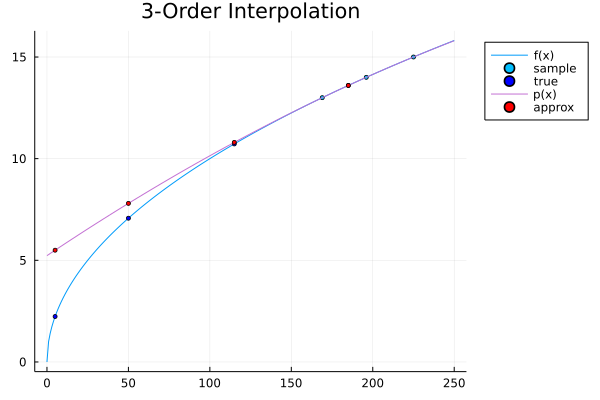

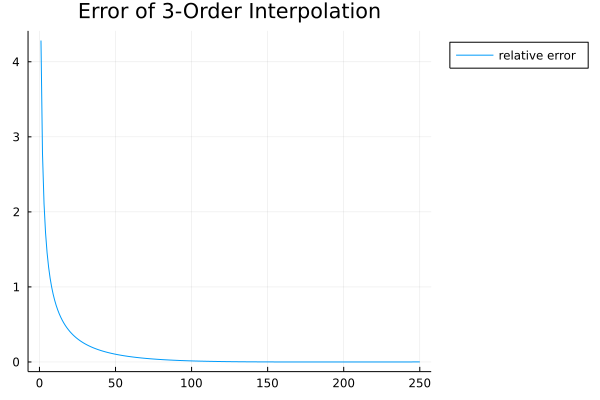

f(x) = sqrt(x)
test_x: [5, 50, 115, 185]
test_y: [2.23606797749979, 7.0710678118654755, 10.723805294763608, 13.601470508735444]
pred_y: [4.439111613024664, 7.284961415396204, 10.722755505364201, 13.535667231319408]
f(x) = sqrt(x)
test_x: [5, 50, 115, 185]
test_y: [2.23606797749979, 7.0710678118654755, 10.723805294763608, 13.601470508735444]
pred_y: [5.4971720488960045, 7.80012771392083, 10.800492610837438, 13.600620324758255]


In [123]:
f(x) = sqrt(x)
split_xs = [100, 121, 144]
test_x = [5, 50, 115, 185]
xlim = [0, 250]
# ylim = [-1, 2]
ylim = []
println("f(x) = sqrt(x)")
show_result(f, nothing, split_xs, test_x, xlim, ylim)

f(x) = sqrt(x)
split_xs = [169, 196, 225]
test_x = [5, 50, 115, 185]
xlim = [0, 250]
# ylim = [-1, 2]
ylim = []
println("f(x) = sqrt(x)")
show_result(f, nothing, split_xs, test_x, xlim, ylim)

### 思考题

1. 对实验 1 存在的问题，应如何解决？

   当插值多项式次数过高的时候会出现Runge现象，插值多项式在距离已知点位置较远处会剧烈震荡，越靠近端点，逼近的效果越差，这表明了节点的密集不一定能保证在两节点间插值函数逼近程度的上升。

   这一问题的解决方案主要有两类。
   
   一个是从插值函数的二阶导数剧烈变化出发，修改插值条件对插值函数的二阶导数进行限制，如使用Hermite型插值；
   
   另一种是将长区间划分为若干个小区间，在每一个小区间上分别做低次插值来避免Runge现象，逼近效果要比在整个区间上用告辞光滑差值效果更好，即使用分段插值和样条插值。
   
   > 参考自教材《数值分析原理》吴勃英 123页

2. 对实验 2 存在的问题的回答，试加以说明

   首先不一定，从精度上考虑虽然有一定的合理性，但插值节点过于密集时，一方面计算量增大却没提高对于精度计算的收益，另一方面区间缩短、节点增加并不能保证两节点间能很好的逼近函数，反而有可能出现Runge现象。但合理的对区间长度进行选择，同时采用低次插值来避免Runge现象，能够得到较好的拟合效果。
   
   不过，实例中对于函数$f(x)=\frac{1}{1+x^2}$，较短区间的插值效果比长区间插值更好
   
   而函数$f(x)=e^x$无论是长区间还是短区间插值，都能得到相对较好的拟合效果，但短区间插值相对误差更低

3. 略

4. 如何理解插值问题中的内插和外推？

   通常我们认为对于连续函数内插的可靠程度高于外推，因为对于未知的连续函数而言，我们无法预知任何在已知点信息之外的有关函数的信息，无法简单通过多项式插值来对函数趋势进行判断。
   
   外推等价于根据已知点预测完全未知点的函数值，但我们所得的插值多项式不含有任何有关待拟合函数的已知点外的信息，根据多项式函数的特性进行外推是不合理的
   
   而考虑到连续函数，内插则不会对于函数的拟合存在无根据的外推过程，同时是有限的利用已知插值节点的关系，故有更高的可靠程度
   
   从实验结果来看，第一个实例体现的是外推的严重错误，尽管第二个实例中外推所得误差稍小于内插结果，但在事实上这只是所选区间拟合的巧合，而内插误差虽然略高，却也具有相当低的误差和相当高的可靠程度